In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from src import utils_knn, utils_knn_2, utils_ald

In [2]:
data_full = pd.read_csv('data/data_full.csv')

In [3]:
data_full

,gender,medal,type,year,country,abb,longitude,latitude
0,Men,Gold,Archery,1980,Denmark,DEN,9.501785,56.263920
1,Men,Silver,Archery,1980,FR Germany,FRG,10.451526,51.165691
2,Men,Bronze,Archery,1980,Japan,JPN,138.252924,36.204824
3,Men,Gold,Archery,1980,FR Germany,FRG,10.451526,51.165691
4,Men,Silver,Archery,1980,Belgium,BEL,4.469936,50.503887
...,...,...,...,...,...,...,...,...
19440,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19441,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19442,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19443,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004


In [4]:
data_archery = pd.read_csv('data/medal_country_year_archery.csv')
data_archery

,year,country,longitude,latitude,value
0,0.0,Denmark,9.501785,56.263920,G
1,0.0,FR Germany,10.451526,51.165691,G
2,0.0,Canada,-106.346771,56.130366,G
3,0.0,Mexico,-102.552784,23.634501,G
4,0.0,Finland,25.748151,61.924110,G
...,...,...,...,...,...
1135,9.0,Mozambique,35.529562,-18.665695,0
1136,9.0,Libya,17.228331,26.335100,0
1137,9.0,Philippines,121.774017,12.879721,0
1138,9.0,Laos,102.495496,19.856270,0


In [5]:
def calculer_distance(longitudeA,latitudeA,yearA,longitudeB,latitudeB,yearB):
    K = 1
    result = sqrt((longitudeA-longitudeB)^2 + (latitudeA-latitudeB)^2) + K * abs(yearA-yearB)
    return result

In [6]:
cls_archery = KNeighborsClassifier(n_neighbors=5)
X_archery = pd.DataFrame()
X_archery['longitude'] = data_archery['longitude']
X_archery['latitude'] = data_archery['latitude']
X_archery['year'] = data_archery['year']
y_archery = data_archery['value']

In [7]:
X_archery_train, X_archery_val, y_archery_train, y_archery_val = train_test_split(X_archery, y_archery, train_size=0.66)
cls_archery.fit(X_archery_train, y_archery_train) 
labels_archery = cls_archery.predict(X_archery_val)
right = 0
false = 0
a = y_archery_val.tolist()
y_archery_val_cpy = []
for i in range(len(labels_archery)):
    if labels_archery[i] ==  a[i]:
        right += 1
    else:
        false += 1
print('eff = ', right , false)

eff =  340 48


In [8]:
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
gen = utils_knn_2.knn_simple_validation(X_archery_train, y_archery_train, X_archery_val, y_archery_val, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])


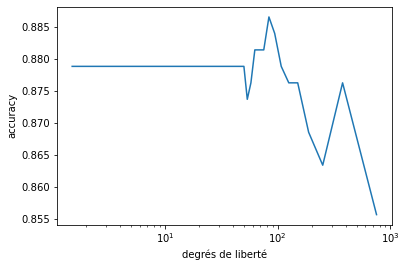

In [9]:
sp1 = sns.lineplot(x="degrés de liberté", y="accuracy", data=df)
sp1.set(xscale="log")
plt.savefig("new images/archery_knn_simple_validation_medal_by_longlat_accuracy_1")

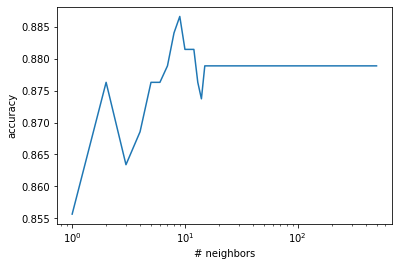

In [10]:
sp2 = sns.lineplot(x="# neighbors", y="accuracy", data=df)
sp2.set(xscale="log")
plt.savefig("new images/archery_knn_simple_validation_medal_by_longlat_accuracy_2")

In [11]:
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour

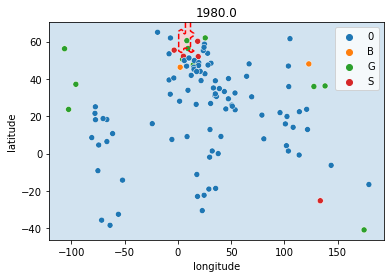

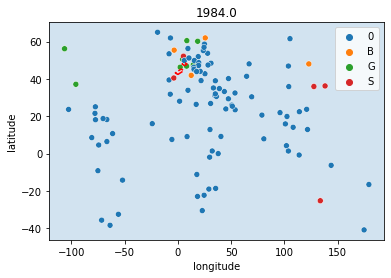

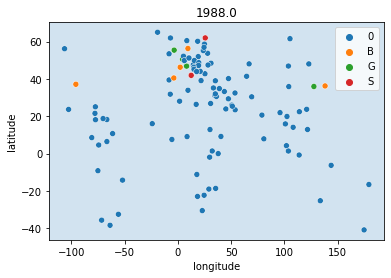

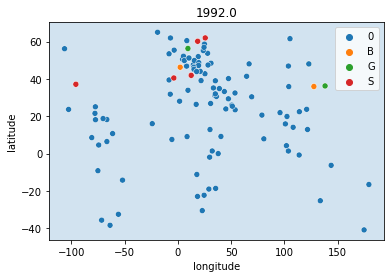

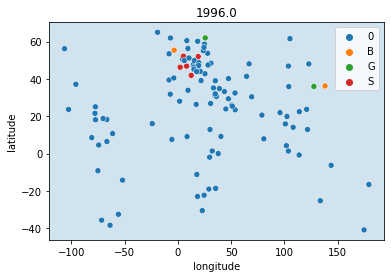

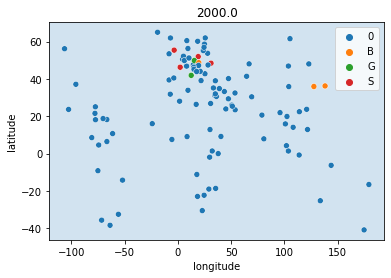

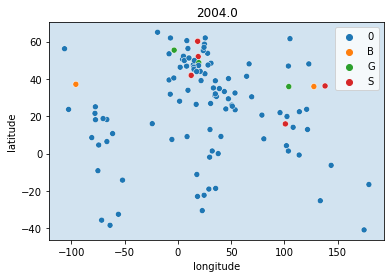

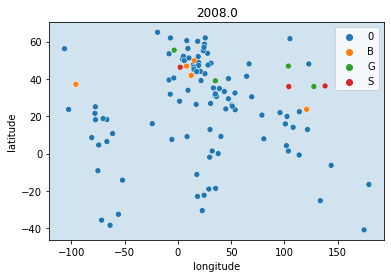

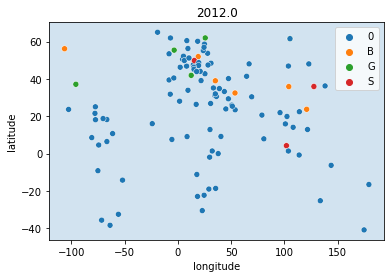

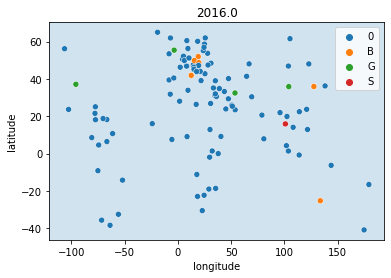

In [12]:
cls = KNeighborsClassifier(n_neighbors=Kopt)
c=1
for year in data_archery["year"].unique():
    plt.figure(c)
    plt.subplot().set_title(year*4 + 1980)
    x_visual = pd.DataFrame()
    data_year = data_archery[data_archery["year"] == year]
    
    x_visual['longitude'] = data_year['longitude']
    x_visual['latitude'] = data_year['latitude']
    y_visual = data_year['value']
    cls.fit(x_visual, y_visual)
    utils_knn.plot_clustering(x_visual, y_visual)
    utils_ald.add_decision_boundary(cls)
    c += 1


In [13]:
train_size = 0.90
n_splits = 10
gen = utils_knn_2.knn_multiple_validation(X_archery, y_archery, n_splits, train_size, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

2

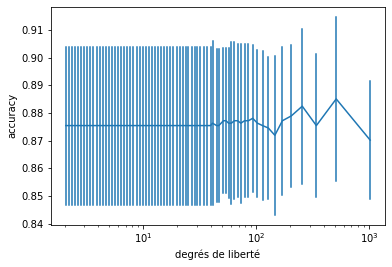

In [14]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/archery_knn_multiple_validation_medal_by_longlat_accuracy")

In [15]:
n_folds = 10
gen = utils_knn_2.knn_cross_validation(X_archery, y_archery, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

2

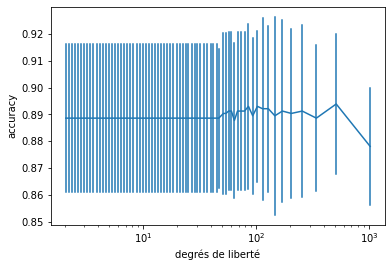

In [16]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/archery_knn_cross_validation_medal_by_longlat_accuracy")

In [17]:
from sklearn.model_selection import cross_val_score
n_folds = 10
gen = utils_knn_2.knn_cross_validation2(X_archery, y_archery, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt


4

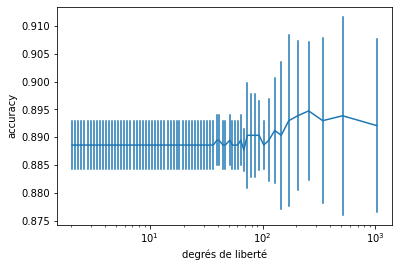

In [18]:
sp = sns.lineplot(x="degrés de liberté", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.savefig("new images/archery_knn_cross_validation2_medal_by_longlat_accuracy")